# **Tarea 2**
**Valeria Ferreira Nocua**


Support each piece of code with a thorough explanation of its methods, techniques, functions, and tricks. Reference your search source(papers, books, tutorials, websites, etc.). Add any necessary bibliographical references or links. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#clase punto que es para un vértice, tiene x, y, y su nombre
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name
    self.type = None
  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

In [3]:
#graficar poligonooos
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'darkviolet')
    xcoor.append(i.x)
    ycoor.append(i.y)
    plt.annotate(i.name, xy=[i.x, i.y])
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'hotpink')
  
  
  plt.show()



In [4]:
def toPoint(P):
  #pasa una lista de puntos a una lista de elementos de la clase puntos
  points = []
  for i in range(len(P)):
    points.append(Point(P[i][0], P[i][1], 'p' + str(i+1).zfill(2)))
  
  return points

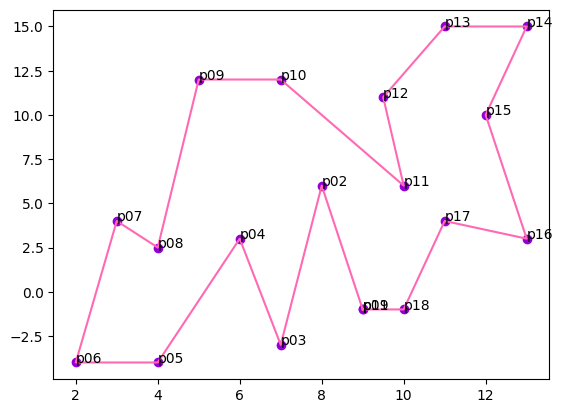

In [5]:
p = [(9.0,-1.0), (8.0,6.0), (7.0,-3.0), (6.0,3.0), (4.0,-4.0), (2.0,-4.0),
          (3.0,4.0), (4.0,2.5), (5.0,12.0), (7.0,12.0), (10.0,6.0), (9.5,11.0),
          (11.0,15.0), (13.0,15.0), (12.0,10.0), (13.0,3.0), (11.0,4.0), 
          (10.0,-1.0), (9.0, -1.0)]



points = toPoint(p)


polygon(points)


1. Write down a code able to identify if the points are ordered in a counterclockwise order. The code should inverse the order of points so that they are counterclockwise ordered if they are in the opposite order. **Explain and implement your procedure**.

In [6]:
def crossProd(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

In [7]:
def checkorder(points):
    newp = []
    cross_sum = 0
    n = len(points)
    for i in range(n):
        cross = crossProd(points[i], points[(i+1)%n], points[(i+2)%n])
        cross_sum += cross
    
    if cross_sum > 0:
        print('the points are in a counterclockwise order')
        newp = points
        return newp
    else:
        print('the points are in a clockwise order, changing the order ....')
        newp = points.reverse()
        return newp

In [8]:
checkorder(points)

the points are in a clockwise order, changing the order ....


2. Write down a code able to read the ordered points and create a doubly-connected edge list for the simple polygon. **Print the doubly-connected edge list related to the simple polygon**.

In [9]:
#semi arista
class HalfEdge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp
    self.twin = None
    self.next = None
    self.prev = None
    self.face = None
    self.name = f'e{startp.name[1]}{startp.name[2]}-1'

  def __repr__(self):
    #return(f"(inicio: {self.startp}, final: {self.endp})")
    return (f'{self.name}')

In [10]:
#Twin de la semi arista
def twin(x):
  if x.name[4] == "1":
    return str(x.name[0]+x.name[1]+x.name[2] + x.name[3]+"2")
  else:
    return str(x.name[0] + x.name[1]  + x.name[2] + "1")
  
def AssignValues (points):
  edges = []
  for i in range(len(points)-1):
        e = HalfEdge(points[i], points[i+1])
        edges.append(e)

  edges.append(HalfEdge(points[-1], points[0]))
  

  for i in range(len(edges)-1):
    e = edges[i]
    e.next = edges[i+1]
    e.prev = edges[i-1]
    e.twin = twin(e)
    e.face = 'f1'
  
  
  e = edges[-1]
  e.next = edges[0]
  e.prev = edges[-2]
  e.twin = twin(e)
  e.face = 'f1'

  for t in range(len(edges)):
    e = edges[t]
    new = HalfEdge(e.endp, e.startp)
    new.name = e.twin
    new.next = e.prev.twin
    new.prev = e.next.twin
    new.twin = e.name
    new.face = 'f2'
    edges.append(new)

  return edges


#imprime un df de la lista de aristas doble conectadas

def ListOfedges(edges):
    names, origin, twins, next, prev, face = [],[],[],[],[], []
    
    for e in edges:
      names.append(e)
      origin.append(e.startp)
      twins.append(e.twin)
      next.append(e.next)
      prev.append(e.prev)
      face.append(e.face)

    df = {'Arista': names, 'Origen': origin, 'Twin': twins, 'Next': next, 
          'Previous': prev, 'CaraIn': face}
    dcel = pd.DataFrame(df)

    return dcel

In [11]:
def ListOfNodes(points, edges):
    ver, coor, inEdge = [], [], []
    for p in points:
        ver.append(p.name)
        c = f'({p.x},{p.y})'
        coor.append(c)
        for e in edges:
            if p.name[1:] == e.name[1:3] and e.name[4] == '1':
                inEdge.append(e.name)
    df = {'Vertice': ver, 'Coordenada': coor, 'AristaIn': inEdge}
    nodesList = pd.DataFrame(df)
    
    return nodesList


In [20]:
def ListOfFaces(edges):   
    count = 0 
    faces, outer, inter = [], [], []

    while count < 1:
        for e in edges:
            if e.face not in faces:
                faces.append(e.face)
                if e.face == 'f1':
                    outer.append('nil')
                    inter.append(e.name)
                elif e.face == 'f2':
                    outer.append(e.name)
                    inter.append('nil')
            count = 1
    
    df = {'Cara': faces, 'Comp. Ext': outer, 'Comp. Int': inter}
    facesList  = pd.DataFrame(df)
    return facesList
            
    


In [21]:
edges = AssignValues(points)
listOfEdges = ListOfedges(edges)
listOfEdges

#Agregar twins a las listas de aristas done
# hacer lista de caras y vertices 
# identificar caras con los ciclos 
# hacer una lista con las 3 listas
#Agregar una diagonal

,Arista,Origen,Twin,Next,Previous,CaraIn
0,e19-1,"(9.0, -1.0)",e19-2,e18-1,e01-1,f1
1,e18-1,"(10.0, -1.0)",e18-2,e17-1,e19-1,f1
2,e17-1,"(11.0, 4.0)",e17-2,e16-1,e18-1,f1
3,e16-1,"(13.0, 3.0)",e16-2,e15-1,e17-1,f1
4,e15-1,"(12.0, 10.0)",e15-2,e14-1,e16-1,f1
5,e14-1,"(13.0, 15.0)",e14-2,e13-1,e15-1,f1
6,e13-1,"(11.0, 15.0)",e13-2,e12-1,e14-1,f1
7,e12-1,"(9.5, 11.0)",e12-2,e11-1,e13-1,f1
8,e11-1,"(10.0, 6.0)",e11-2,e10-1,e12-1,f1
9,e10-1,"(7.0, 12.0)",e10-2,e09-1,e11-1,f1


In [22]:
listOfNodes = ListOfNodes(points, edges)
listOfNodes

,Vertice,Coordenada,AristaIn
0,p19,"(9.0,-1.0)",e19-1
1,p18,"(10.0,-1.0)",e18-1
2,p17,"(11.0,4.0)",e17-1
3,p16,"(13.0,3.0)",e16-1
4,p15,"(12.0,10.0)",e15-1
5,p14,"(13.0,15.0)",e14-1
6,p13,"(11.0,15.0)",e13-1
7,p12,"(9.5,11.0)",e12-1
8,p11,"(10.0,6.0)",e11-1
9,p10,"(7.0,12.0)",e10-1


In [24]:
#lista de caras
listofFaces = ListOfFaces(edges)
listofFaces

,Cara,Comp. Ext,Comp. Int
0,f1,nil,e19-1
1,f2,e19-2,nil


In [33]:
lists = [listOfEdges, listOfNodes, listofFaces]
# acceder a una columna en específica 
# # lists[0].Twin
# acceder a una fila en específico 
# # lists[0].iloc[0]


Arista            e19-1
Origen      (9.0, -1.0)
Twin              e19-2
Next              e18-1
Previous          e01-1
CaraIn               f1
Name: 0, dtype: object

In [15]:
#funcion para identificar caras nuevas
def idFaces(edge):
    cicle = [edge.prev, edge.name]
    while edge.next not in cicle:
        

SyntaxError: incomplete input (869870739.py, line 5)

In [ ]:
#funcion para agregar una diagonal

3. Implement an algorith, able to split the given polygon into y-monotone polygons. Give your answer in terms of doubly-connected edge lists. **Plot the split into y-monotone polygon**

In [ ]:
#y-monotonos
def YMonotone(lists):
    

4. Implement the triangulation procedure and apply it to each y-monotone polygons. Give your answer in terms of a doubly-connected edge list. **Plot the triangulated polygon**

5. Find the vertices from which a minimum number of cameras could be used to guard the entire polygon. **Identify and plot the places where the cameras should be localized**